In [1]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#cargamos los datos de entrada
data = pd.read_csv("/Users/manuelmoya/Documents/USACH/2019-1er/Tesis/1.Desarrollo/05.AnalisisDatos/Datos/reg_wf_r.csv")
#veamos cuantas dimensiones y registros contiene
data.shape

# Ver los 1ros registros
data.head()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
0,10,3.23,90.19,2009,7,1,0,0.025
1,18,3.28,72.75,2009,7,1,0,0.005
2,21,2.98,97.73,2009,7,1,0,0.000
3,45,3.96,129.13,2009,7,1,0,0.080
4,2,3.20,103.36,2009,7,1,12,0.020


In [2]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,hors,ws,wd,anno,mes,dia,horsObs,wp1
count,7547.000000,7547.000000,7547.000000,7547.000000,7547.000000,7547.000000,7547.000000,7547.000000
mean,24.414204,4.091628,146.217623,2010.165629,6.925666,15.727176,6.023056,0.253244
std,13.699325,1.894296,93.159099,0.896216,3.414615,8.810813,6.000353,0.246056
min,1.000000,0.060000,0.170000,2009.000000,1.000000,1.000000,0.000000,0.000000
25%,12.000000,2.770000,74.385000,2010.000000,4.000000,8.000000,0.000000,0.055000
50%,24.000000,3.690000,124.460000,2010.000000,7.000000,16.000000,12.000000,0.180000
75%,36.000000,5.140000,197.945000,2011.000000,10.000000,23.000000,12.000000,0.381000
max,48.000000,13.910000,359.960000,2012.000000,12.000000,31.000000,12.000000,0.947000


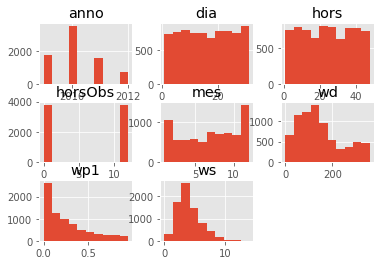

In [3]:
# Visualizamos rápidamente las caraterísticas de entrada
data.hist()
plt.show()

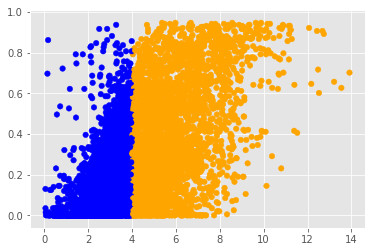

In [4]:
colores=['orange','blue']
tamanios=[30,60]
 
f1 = data['ws'].values
f2 = data['wp1'].values
 
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in data.iterrows():
    if(row['ws']>4):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [5]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
filtered_data = data
dataX =filtered_data[["ws"]]
X_train = np.array(dataX)
y_train = filtered_data['wp1'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))

Coefficients: 
 [0.08131411]
Independent term: 
 -0.07946343458510363
Mean squared error: 0.04
Variance score: 0.39


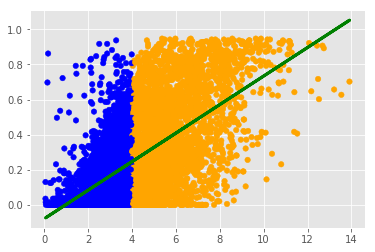

In [6]:
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
#plt.show()

plt.plot(X_train, y_pred, color='green',
linewidth=3, label=u'Regresión MCO')

In [7]:
#Vamos a comprobar:
# Quiero predecir cuántos "wp1" voy a obtener por 13 ws (wind speed mph),
# según nuestro modelo, hacemos:
5
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_12 = regr.predict([[12]])
print(y_12)

[0.89630583]
